In [1]:
import joblib
import pandas as pd
import lightgbm as lgb

model = joblib.load("lgb.pkl")

In [4]:
data = pd.read_parquet("data/dataset3.parquet")
data.pop("utility")
data.pop("game")
train_data = data.sample(frac=0.8, random_state=1)
test_data = data.drop(train_data.index)
# Convert the data into LightGBM's format
train_dataset = lgb.Dataset(train_data.drop('rank', axis=1), label=train_data['rank'])
test_dataset = lgb.Dataset(test_data.drop('rank', axis=1), label=test_data['rank'])

In [5]:
data.head()

,roll,x,y,light_turn,light_score,dark_score,light_left,dark_left,rank,game0,...,game10,game11,game12,game13,game14,game15,game16,game17,game18,game19
0,2,0,4,True,0,0,6,7,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,3,True,0,0,6,7,2,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,3,True,0,0,6,7,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,4,True,0,0,6,7,2,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,4,True,0,0,6,7,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
predictions = model.predict(test_data.drop('rank', axis=1))
pred_test = pd.DataFrame({"pred": predictions.round(), "test": test_data['rank']})
pred_test["diff"] = (pred_test["pred"] - pred_test["test"]).abs()

In [7]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 500)
print(pred_test)

       pred  test  diff
7       2.0     2   0.0
10      2.0     2   0.0
17      2.0     2   0.0
20      1.0     1   0.0
29      1.0     1   0.0
43      2.0     2   0.0
53      1.0     1   0.0
54      1.0     2   1.0
58      1.0     1   0.0
65      2.0     2   0.0
66      1.0     1   0.0
76      1.0     1   0.0
81      2.0     2   0.0
83      2.0     2   0.0
88      1.0     1   0.0
90      1.0     1   0.0
97      2.0     2   0.0
100     1.0     1   0.0
104     1.0     1   0.0
106     1.0     1   0.0
107     2.0     2   0.0
110     1.0     1   0.0
124     1.0     1   0.0
126     1.0     1   0.0
132     1.0     1   0.0
134     1.0     1   0.0
135     2.0     2   0.0
138     1.0     1   0.0
145     2.0     2   0.0
148     1.0     1   0.0
158     1.0     1   0.0
160     1.0     1   0.0
166     3.0     3   0.0
169     3.0     3   0.0
174     1.0     1   0.0
177     2.0     2   0.0
178     1.0     1   0.0
185     2.0     2   0.0
186     2.0     3   1.0
191     1.0     1   0.0
202     2.0     

array([[<AxesSubplot: title={'center': 'pred'}>,
        <AxesSubplot: title={'center': 'test'}>],
       [<AxesSubplot: title={'center': 'diff'}>, <AxesSubplot: >]],
      dtype=object)

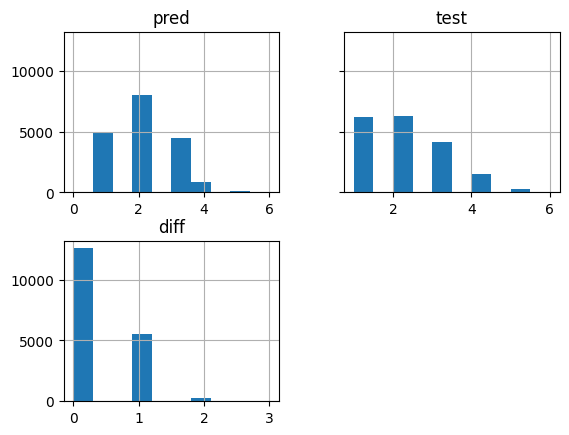

In [8]:
pred_test.hist(sharey=True)

In [11]:
test_data_c = test_data.copy()
test_data_c["pred"] = predictions
test_data_c["diff"] = (test_data_c["pred"] - test_data_c["utility"]).abs()
test_data_c.sort_values("diff", ascending=False)

,roll,x,y,light_turn,utility,light_score,dark_score,light_left,dark_left,game0,...,game12,game13,game14,game15,game16,game17,game18,game19,pred,diff
214855,3,1,0,True,-9.728928,3,6,0,0,0,...,0,0,0,-1,0,-1,1,0,-26.041483,1.631255e+01
529383,2,1,5,False,-34.800340,6,3,0,0,0,...,1,1,0,-1,0,0,0,0,-20.981138,1.381920e+01
1144026,4,2,0,False,8.789917,6,2,0,0,0,...,0,1,0,0,0,0,-1,1,-4.444281,1.323420e+01
650404,3,0,4,True,-35.927757,3,6,1,0,0,...,-1,-1,0,0,0,0,1,0,-23.937309,1.199045e+01
1085688,2,0,7,True,-6.336349,5,3,0,1,0,...,0,1,0,1,0,-1,-1,0,4.497221,1.083357e+01
605643,2,1,5,False,12.000573,5,5,0,0,0,...,0,1,0,0,0,-1,-1,0,1.234759,1.076581e+01
230709,2,0,3,True,-34.168983,3,6,0,0,-1,...,0,1,-1,0,0,0,0,0,-23.599813,1.056917e+01
31701,3,1,6,False,-15.751965,6,2,0,0,0,...,1,0,0,1,0,0,-1,0,-5.291898,1.046007e+01
363324,1,0,7,True,1.727245,2,6,0,0,0,...,0,1,0,0,0,-1,-1,0,-8.610560,1.033781e+01
31702,4,1,4,False,-32.504723,6,2,0,0,0,...,1,0,0,1,0,0,-1,0,-22.241976,1.026275e+01
